In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
import random
%matplotlib inline
 
random.seed(100)

In [66]:
data = pd.read_csv('stand_9.csv')
print(data.columns)


Index(['Unnamed: 0', 'STATION ID', 'TIME', 'LAST UPDATED', 'NAME',
       'BIKE STANDS', 'AVAILABLE BIKE STANDS', 'AVAILABLE BIKES', 'STATUS',
       'ADDRESS', 'LATITUDE', 'LONGITUDE', 'STAND_OCCUPANCY',
       'STAND_OCCUPANCY_10', 'STAND_OCCUPANCY_30', 'STAND_OCCUPANCY_60'],
      dtype='object')


In [67]:
time = data['TIME']
data = data[['STATION ID','AVAILABLE BIKE STANDS','STAND_OCCUPANCY','STAND_OCCUPANCY_10', 'STAND_OCCUPANCY_30', 'STAND_OCCUPANCY_60']]
#data.set_index(["TIME"], inplace=True)

In [4]:
data.head()

,STATION ID,AVAILABLE BIKE STANDS,STAND_OCCUPANCY,STAND_OCCUPANCY_10,STAND_OCCUPANCY_30,STAND_OCCUPANCY_60
0,9,15,0.625000,0.583333,0.625000,0.541667
1,9,15,0.625000,0.625000,0.625000,0.500000
2,9,14,0.583333,0.625000,0.583333,0.500000
3,9,14,0.583333,0.625000,0.583333,0.500000
4,9,14,0.583333,0.583333,0.583333,0.500000


In [5]:
data.isnull().any()

STATION ID               False
AVAILABLE BIKE STANDS    False
STAND_OCCUPANCY          False
STAND_OCCUPANCY_10       False
STAND_OCCUPANCY_30       False
STAND_OCCUPANCY_60       False
dtype: bool

In [6]:
data['STATION ID'].unique()

array([9], dtype=int64)

<AxesSubplot:>

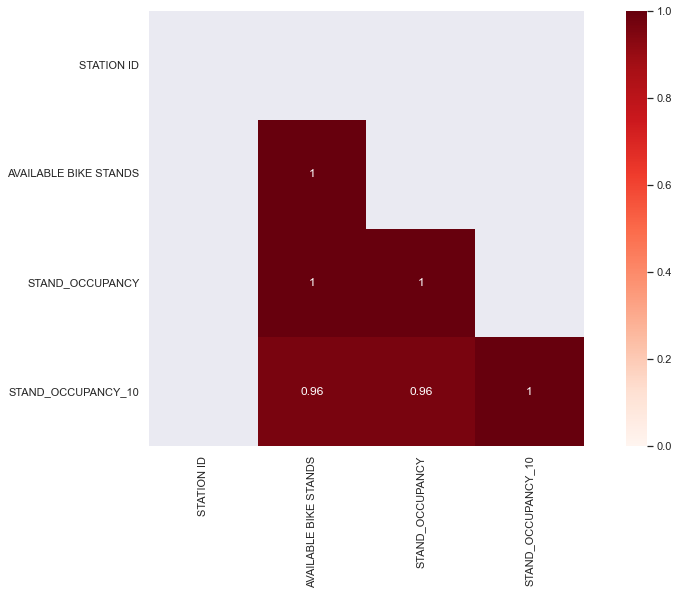

In [68]:
number_features = ['STATION ID','AVAILABLE BIKE STANDS','STAND_OCCUPANCY']
target = ['STAND_OCCUPANCY_10']
matrix = data[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

In [69]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:3]
y1 = data['STAND_OCCUPANCY_10']
y2 = data['STAND_OCCUPANCY_30']
y3 = data['STAND_OCCUPANCY_60']
#x_train, x_test, y1_train,y1_test = train_test_split(x, y1, test_size=0.1, random_state=0)
split =  int(len(x)*0.7)
x_train = x[:split][:]
x_test = x[split:][:]
y1_train = y1[:split]
y1_test = y1[split:]
y2_train = y2[:split]
y2_test = y2[split:]
y3_train = y3[:split]
y3_test = y3[split:]

In [58]:
x_train, x_test, y3_train,y3_test = train_test_split(x, y3, test_size=0.1, random_state=0)

In [70]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(x_train, y3_train) 


RandomForestRegressor(min_samples_split=4, n_estimators=200, n_jobs=1)

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)
score_ndarray = cross_val_score(model, x, y3, cv=kf)
print(score_ndarray)
print(score_ndarray.mean())

[0.63996494 0.60828925 0.62977711 0.62347624 0.63194123 0.61818706
 0.61489926 0.59820276 0.57698927 0.62353589]
0.616526301299454


In [72]:
y3_predict = model.predict(x_test)

In [73]:
print(len(y3_test))
print(len(y3_predict))

6109
6109


In [74]:
time = pd.to_datetime(time)
#df_time = pd.DataFrame(time,columns={'time'})
#time = time.dt.strftime("%Y-%m-%d")

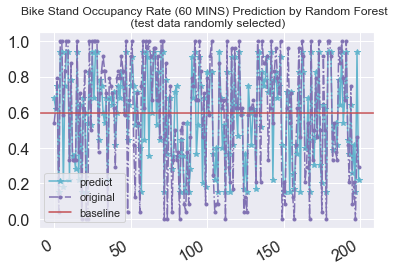

In [63]:
fig=plt.figure()
#x_tick = time[0:1000:100]
length  = 200
plt.plot(np.arange(length),y3_predict[:length],'c*-',label='predict')
plt.plot(np.arange(length),y3_test[:length],'m.-.',label='original')
plt.axhline(y=y3_test.mean(), color='r', linestyle='-',label='baseline')
#plt.xticks(x,time[split:][:count], rotation='vertical')
#plt.xticks(range(0,len(time[split:][:count]),100)) #
fig.autofmt_xdate()
#plt.ylabel('', fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.legend()
plt.title("Bike Stand Occupancy Rate (60 MINS) Prediction by Random Forest \n (test data randomly selected)")
plt.show()

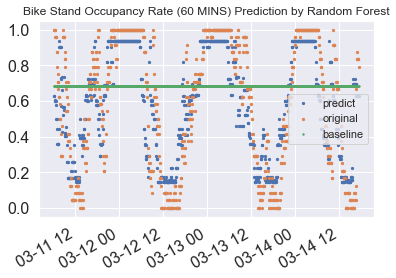

In [76]:
count = 1000
x= np.arange(count)
fig=plt.figure()
#x_tick = time[0:1000:100]
plt.scatter(time[split:][:count],y3_predict[:count],s=5,label='predict')
plt.scatter(time[split:][:count],y3_test[:count],s=5,label='original')
plt.scatter(time[split:][:count],[y3_test.mean()]*len(time[split:][:count]),s=2,label='baseline')
#plt.xticks(x,time[split:][:count], rotation='vertical')
#plt.xticks(range(0,len(time[split:][:count]),100)) #
fig.autofmt_xdate()
#plt.ylabel('', fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.legend()
plt.title("Bike Stand Occupancy Rate (60 MINS) Prediction by Random Forest")
plt.show()

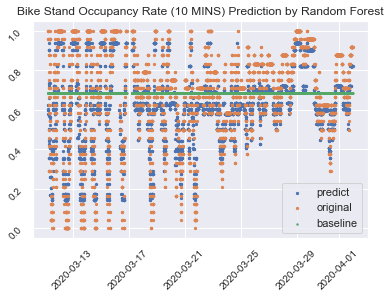

In [77]:
plt.scatter(time[split:],y3_predict,s=5,label='predict')
plt.scatter(time[split:],y3_test,s=5,label='original')
plt.scatter(time[split:],[y3_test.mean()]*len(time[split:]),s=2,label='baseline')
plt.title("Bike Stand Occupancy Rate (10 MINS) Prediction by Random Forest")
plt.tick_params(axis='both',which='major',labelsize=10,rotation=45)
plt.legend()
plt.show()

In [22]:
print(score_ndarray.std())

0.00561558822862395


In [13]:
from prettytable import PrettyTable

In [48]:
table = PrettyTable()
table.field_names = ["Model", 
                     "Mean Squared Error", 
                     "R² score"]
 
models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    #SVR(gamma='auto', kernel='linear'),
    #SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    #BaggingRegressor(KNeighborsClassifier(), 
    #                 max_samples=0.5, 
    #                max_features=0.5),
    #NuSVR(gamma='auto'),
    #RandomForestRegressor(random_state=0, 
    #                      n_estimators=300)
]
 
for model in models:
    model.fit(x_train, y1_train) 
    y1_res = model.predict(x_test)
 
    mse = mean_squared_error(y1_test, y1_res)
    score = model.score(x_test, y1_test)    
 
    table.add_row([type(model).__name__, 
                  format(mse, '.2f'), 
                  format(score, '.2f')])
    #print(table)
 
print(table)


+------------------+--------------------+----------+
|      Model       | Mean Squared Error | R² score |
+------------------+--------------------+----------+
|   SGDRegressor   |        0.04        |   0.55   |
|      Lasso       |        0.01        |   0.90   |
|    ElasticNet    |        0.01        |   0.85   |
|      Ridge       |        0.00        |   0.95   |
| BaggingRegressor |        0.00        |   0.95   |
+------------------+--------------------+----------+


In [106]:
import torch
import torch.nn as nn

In [107]:
class LSTM(nn.Module):
    def __init__(self, input_size=3,hidden_layer_size=100,output_size=1):
        super().__init__()
        self.hidden_layer = hidden_layer_size
        self.lstm = nn.LSTM(input_size,hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size,output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer),
                           torch.zeros(1,1,self.hidden_layer))
    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq),1,-1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq),-1))
        #print("predictions shape",predictions)
        return predictions

In [108]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [57]:
import torch.utils.data as Data
BATCH_SIZE = 100
sqe_len = 20
length = len(x)
x = np.array(x)
x = torch.tensor(x)
y1 = np.array(y1)
y1 = torch.tensor(y1)
torch_dataset = Data.TensorDataset(x,y1) #把数据放在数据库中
loader = Data.DataLoader(
    # 从dataset数据库中每次抽出batch_size个数据
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,#将数据打乱
    num_workers=2, #使用两个线程
)


In [31]:
train_window=12

def create_inout_sequences(input_data,tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        inout_seq.append(train_seq)
    return inout_seq

xtrain_inout_seq = create_inout_sequences(x_train,train_window)
xtrain_inout_seq = np.array(xtrain_inout_seq)
print(xtrain_inout_seq.shape)
y1train_inout_seq = create_inout_sequences(y1_train,train_window)
y1train_inout_seq = np.array(y1train_inout_seq)
print(y1train_inout_seq.shape)

(30528, 12, 3)
(30528, 12)


In [32]:
BATCH_SIZE = 100
xtrain_inout_seq = np.array(xtrain_inout_seq)
xtrain_inout_seq = torch.tensor(xtrain_inout_seq)
y1train_inout_seq = np.array(y1train_inout_seq)
y1train_inout_seq = torch.tensor(y1train_inout_seq)
torch_dataset = Data.TensorDataset(xtrain_inout_seq,y1train_inout_seq) #把数据放在数据库中
loader = Data.DataLoader(
    # 从dataset数据库中每次抽出batch_size个数据
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,#将数据打乱
    num_workers=2, #使用两个线程
)

In [69]:
# 模型的训练
epochs = 20
tmpy_pred = []
tmpbatch_y = []
for i in range(epochs):
    for step,(batch_x,batch_y) in enumerate(loader):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1,1,model.hidden_layer),
                            torch.zeros(1,1,model.hidden_layer))
        batch_x = batch_x.to(torch.float32)
        batch_y = batch_y.to(torch.float32)
        y_pred = model(batch_x)
        y_pred = y_pred.to(torch.float32)
        if i==18 and step==1:
            #print(y_pred.shape)
            #print(batch_y.shape)
            tmpy_pred = y_pred
            tmpbatch_y = batch_y
        single_loss = loss_function(y_pred, batch_y)
        single_loss =single_loss.to(torch.float32)
        single_loss.backward()
        optimizer.step()
    print(f'epoch:{i} loss:{single_loss.item():10.8f}')
print(f'epoch:{i:3} loss:{single_loss.item():10.8f}')

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:0 loss:0.01659148
epoch:1 loss:0.01687826
epoch:2 loss:0.01675576
epoch:3 loss:0.01667886
epoch:4 loss:0.01664431
epoch:5 loss:0.01649513
epoch:6 loss:0.01655656
epoch:7 loss:0.01792893
epoch:8 loss:0.01628787
epoch:9 loss:0.01615924
epoch:10 loss:0.01638337
epoch:11 loss:0.01668456
epoch:12 loss:0.01630477
epoch:13 loss:0.01596773
epoch:14 loss:0.01506355
epoch:15 loss:0.01444070
epoch:16 loss:0.01405937
epoch:17 loss:0.01357942
epoch:18 loss:0.01412628
epoch:19 loss:0.01481155
epoch: 19 loss:0.01481155


In [68]:
print(tmpbatch_y)


[]


In [67]:
tmpbatch_y.shape
#tmpy_pred

AttributeError: 'list' object has no attribute 'shape'

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

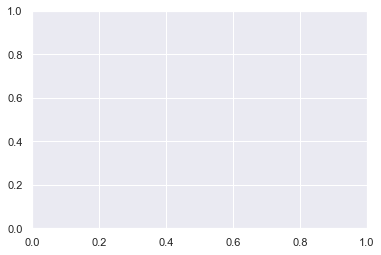

In [66]:
l1, = plt.plot(np.arange(100),list(tmpy_pred),'r',marker='+')
l2, = plt.plot(np.arange(200),list(tmpbatch_y),'b',marker='+')
plt.legend(handles=[l1,l2],labels=['predict stand occupy','stand occupy'],loc='best')
plt.title('LSTM Prediction')
plt.show()